# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [20]:
col_names_upper=list(df.columns)
rename_dict= dict.fromkeys(col_names_upper)
for k in rename_dict.keys():
    rename_dict[k]=k.lower()
rename_dict
df=df.rename(columns=rename_dict)


In [21]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [22]:
df=df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [23]:
df=df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [27]:
def lines_pass(linename):
    return len(linename)
df['Num_Lines']=df.linename.map(lines_pass)

In [39]:
df=df.sort_values('Num_Lines',ascending=False)
df.head()

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines
131329,1237ACENQRSW,R145,R032,00-00-02,TIMES SQ-42 ST,IRT,2018-08-29,04:00:00,REGULAR,5446001,2443889,12
132518,1237ACENQRSW,R151,R033,00-00-05,TIMES SQ-42 ST,IRT,2018-08-31,00:00:00,REGULAR,36398027,88388600,12
132502,1237ACENQRSW,R151,R033,00-00-05,TIMES SQ-42 ST,IRT,2018-08-28,11:29:43,REGULAR,36392251,88378983,12
132501,1237ACENQRSW,R151,R033,00-00-05,TIMES SQ-42 ST,IRT,2018-08-28,10:00:23,REGULAR,36392128,88378773,12
132500,1237ACENQRSW,R151,R033,00-00-05,TIMES SQ-42 ST,IRT,2018-08-28,08:00:00,REGULAR,36391956,88378253,12


## Write a function to clean a column name.

In [30]:
def clean(col_name):
    cleaned = col_name.title()
    return cleaned

In [31]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [32]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [33]:
df['Date']=pd.to_datetime(df.Date)


pandas.core.series.Series

In [36]:
print(df.Date.dtype)
df.head()

datetime64[ns]


,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7


In [43]:
## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.
df['Dayname']=df.Date.dt.day_name()
df.head()

,Linename,Unit,Scp,Station,Date,Time,Desc,Entries,Exits,Num_Lines,Day_of_Week,Dayname
131329,1237ACENQRSW,R032,00-00-02,TIMES SQ-42 ST,2018-08-29,04:00:00,REGULAR,5446001,2443889,12,2,Wednesday
132518,1237ACENQRSW,R033,00-00-05,TIMES SQ-42 ST,2018-08-31,00:00:00,REGULAR,36398027,88388600,12,4,Friday
132502,1237ACENQRSW,R033,00-00-05,TIMES SQ-42 ST,2018-08-28,11:29:43,REGULAR,36392251,88378983,12,1,Tuesday
132501,1237ACENQRSW,R033,00-00-05,TIMES SQ-42 ST,2018-08-28,10:00:23,REGULAR,36392128,88378773,12,1,Tuesday
132500,1237ACENQRSW,R033,00-00-05,TIMES SQ-42 ST,2018-08-28,08:00:00,REGULAR,36391956,88378253,12,1,Tuesday


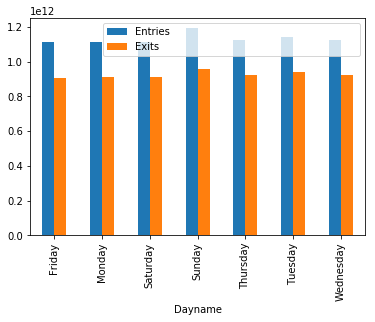

In [47]:
#grouped = df.groupby('Dayname').sum()
#grouped=grouped.drop(columns=['Num_Lines','Day_of_Week'])
grouped.head()

grouped.plot(kind='bar')

# Drop a couple of columns

In [40]:
df=df.drop(columns=['Division','C/A'])
df.head()

,Linename,Unit,Scp,Station,Date,Time,Desc,Entries,Exits,Num_Lines
131329,1237ACENQRSW,R032,00-00-02,TIMES SQ-42 ST,2018-08-29,04:00:00,REGULAR,5446001,2443889,12
132518,1237ACENQRSW,R033,00-00-05,TIMES SQ-42 ST,2018-08-31,00:00:00,REGULAR,36398027,88388600,12
132502,1237ACENQRSW,R033,00-00-05,TIMES SQ-42 ST,2018-08-28,11:29:43,REGULAR,36392251,88378983,12
132501,1237ACENQRSW,R033,00-00-05,TIMES SQ-42 ST,2018-08-28,10:00:23,REGULAR,36392128,88378773,12
132500,1237ACENQRSW,R033,00-00-05,TIMES SQ-42 ST,2018-08-28,08:00:00,REGULAR,36391956,88378253,12
